In [14]:
import sys
sys.path.insert(0, '..')

In [26]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

ModuleNotFoundError: No module named 'python_environment_check'

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix ## Pip installed this like 30 times.

import seaborn as sns
from mlxtend.plotting import heatmap



In [49]:


# Defining the columns to use from the dataset
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

# Reading the data from the URL, using only the specified columns
df = pd.read_csv('AmesHousing.txt', 
                 sep='\t',  # Indicates that the fields are separated by a tab
                 usecols=columns)  # Only load the specified columns for efficiency

: 

In [17]:
# Displaying the first five rows of the DataFrame to check its contents
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [18]:
df.shape

(2930, 6)

In [19]:
# Convert 'Central Air' column values from 'N' and 'Y' to 0 and 1, respectively, for analysis
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

# Check for missing values across all columns to identify if any data cleaning is needed
df.isnull().sum()



Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [20]:
# Remove rows that contain missing values to ensure the dataset is clean for analysis
df = df.dropna(axis=0)


In [21]:
# Confirm there are no missing values left in the dataset after cleaning
df.isnull().sum()


Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

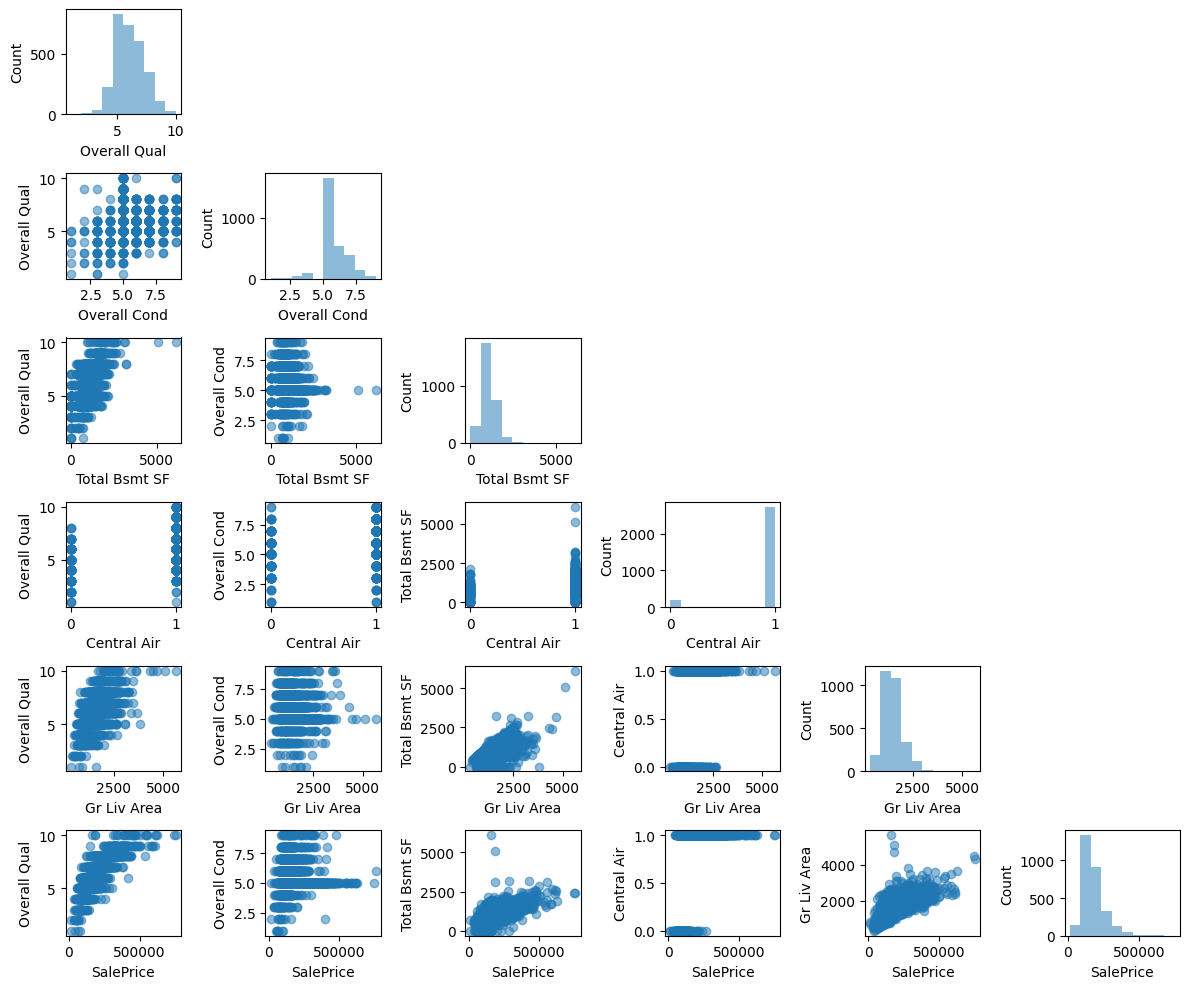

In [22]:
# Generate a scatter plot matrix from the DataFrame 'df'. This provides a visual examination 
# of the pairwise relationships between the variables. The 'figsize' parameter specifies the 
# size of the figure object to create. 'names' provides the column names for the axes labels 
# from the DataFrame. 'alpha' sets the transparency level of the points on the scatter plots.
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

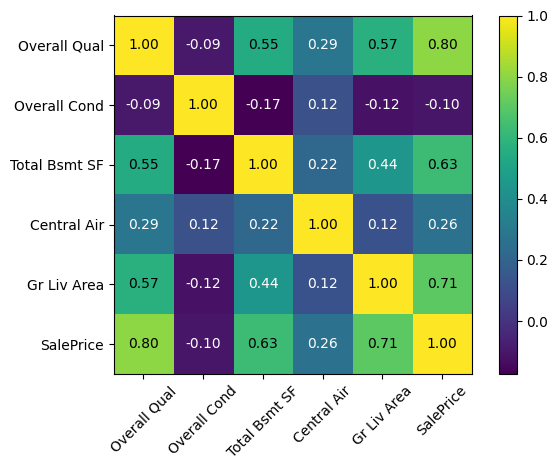

In [27]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df.values.T)# Create a correlation matrix 'cm' from the transposed values of the DataFrame 'df'. This matrix shows how each pair of variables in the DataFrame is correlated.
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

In [28]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [29]:
X = df[['Gr Liv Area']].values # This creates a 2D array (or matrix) where each row corresponds to a different observation (e.g., a different house)
y = df['SalePrice'].values # This creates a 1D array where each element corresponds to the sale price of a house. 

In [30]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [31]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

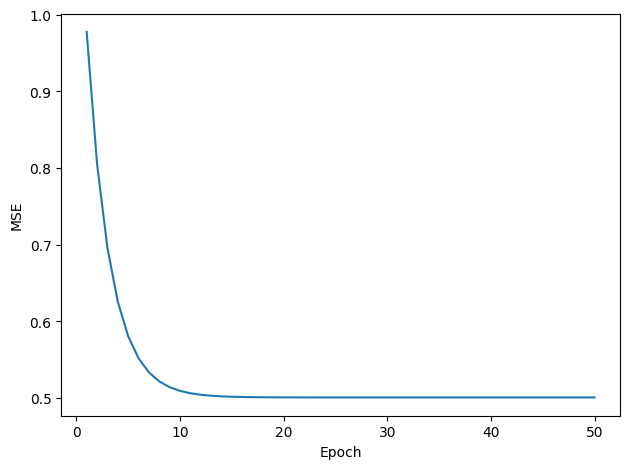

In [32]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

In [33]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

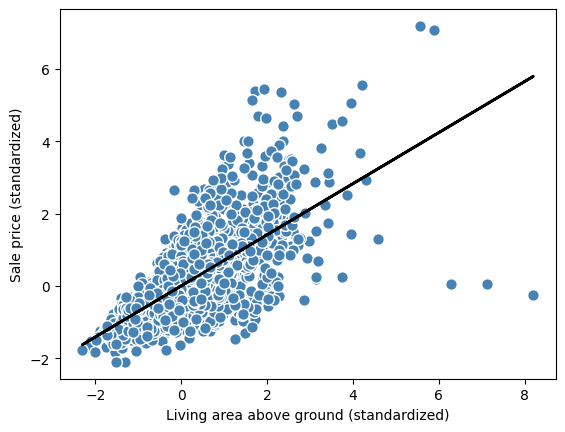

In [34]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()

In [35]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07


In [36]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


## Estimating the coefficient of a regression model via scikit-learn

In [37]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


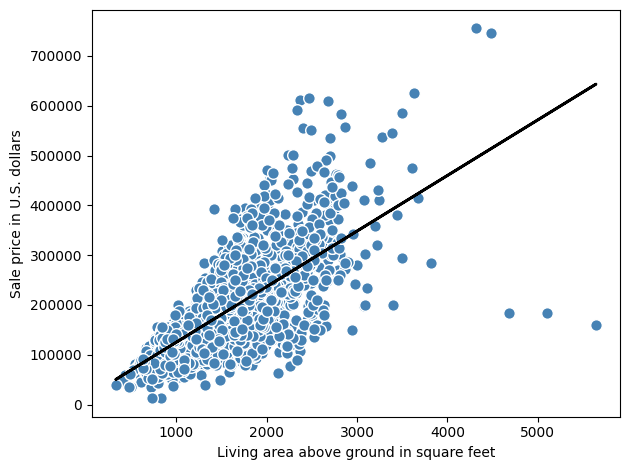

In [38]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

# Normal Equations alternative

In [39]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'Slope: {w[1]:.3f}')
print(f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


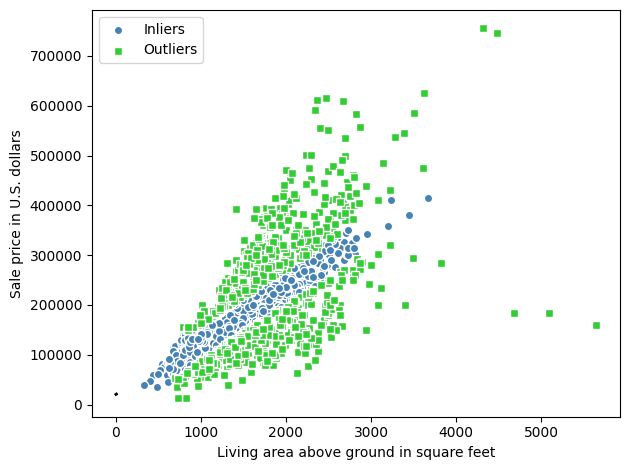

In [40]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=None, # default 
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [41]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')# regression model. This value indicates how much the predicted value of the sale price changes with a one-unit change 
print(f'Intercept: {ransac.estimator_.intercept_:.3f}') # Print out the intercept of the line. The 'intercept' is the predicted value of the sale price when the living area is zero.

Slope: 106.348
Intercept: 20190.093


In [43]:
def median_absolute_deviation(data):# Define a function to calculate the Median Absolute Deviation (MAD) of a dataset.
    return np.median(np.abs(data - np.median(data))) # Subtract the median from each data point and take the absolute value,
    # then find the median of these absolute deviations.
    
median_absolute_deviation(y)

37000.0

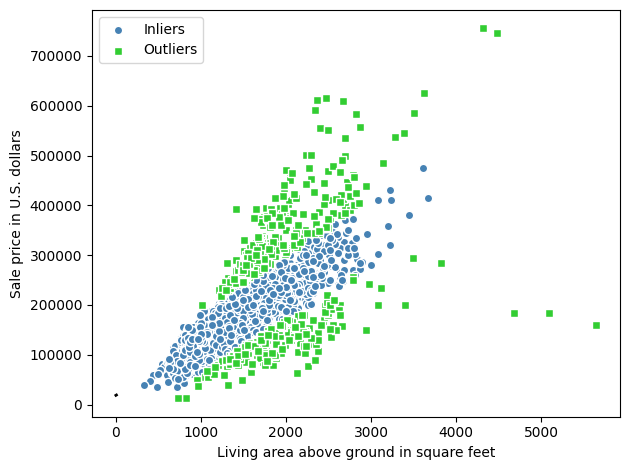

In [44]:
# Initialize a RANSAC (Random Sample Consensus) Regressor with a base Linear Regression model.
# 'max_trials' sets the maximum number of iterations for random sample selection.
# 'min_samples' defines the minimum number of data points required to fit the model (here as a fraction of total data).
# 'loss' specifies which metric to use for calculating residuals (absolute_error is the default).
# 'residual_threshold' sets the maximum residual for a data point to be classified as an inlier.
# 'random_state' ensures reproducibility of the results.
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=0.95, 
                         loss='absolute_error', 
                         residual_threshold=65000, 
                         random_state=123)

# Fit the RANSAC regressor to the data.
ransac.fit(X, y)

# Determine which points are inliers (fitting well to the model) and which are outliers.
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Prepare data for plotting the regression line.
line_X = np.arange(3, 10, 1)  # X values for plotting the line.
line_y_ransac = ransac.predict(line_X[:, np.newaxis])  # Predicted Y values for the line.

# Plot inliers: points fitting well to the RANSAC model.
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')

# Plot outliers: points not fitting well to the RANSAC model.
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')

# Plot the RANSAC regression line.
plt.plot(line_X, line_y_ransac, color='black', lw=2)   

# Label the axes and add a legend.
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

# Ensure the plot is neatly laid out.
plt.tight_layout()

# Uncomment the next line to save the figure as a PNG file.
# plt.savefig('figures/09_10.png', dpi=300)

# Display the plot.
plt.show()


In [45]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 105.631
Intercept: 18314.587


## Evaluating the performance of linear regression models

In [46]:
# Import the train_test_split function from scikit-learn's model_selection module.
# This function is used to split a dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

# Set 'SalePrice' as the target variable.
target = 'SalePrice'

# Create a list of feature names by excluding the target variable from the DataFrame's columns.
features = df.columns[df.columns != target]

# Extract the feature data (X) and the target data (y) from the DataFrame.
# X contains all data from the columns listed in 'features'.
# y contains the data from the 'SalePrice' column, our target variable.
X = df[features].values
y = df[target].values

# Split the dataset into training and testing sets.
# 'test_size=0.3' means that 30% of the data will be used for testing, while 70% will be used for training.
# 'random_state=123' ensures that the splits are reproducible and consistent across different executions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)


In [48]:
slr = LinearRegression()

slr.fit(X_train, y_train)# Fit the model to the training data. This means finding the best parameters for the linear regression model
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)